In [1]:
from my_functions import *

#Main Libraries 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import datetime
import scipy.fftpack
import tensorflow as tf
from tensorflow import keras # And the tf and keras framework, thanks to Google
import scipy.io as io
import sys, os, time
import math
from scipy.fft import fft, fftfreq #Fourier
import pywt # Wavelet

from skimage.restoration import denoise_wavelet #Noise
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.manifold import TSNE
import time
from tensorflow.python.framework import ops

#Extra Libraries 
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm
from scipy.spatial.distance import pdist, squareform
import random
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns #I used sns.distplot because it has more manual properties than plt.hist()
from scipy.stats import pearsonr #includes the PCC function

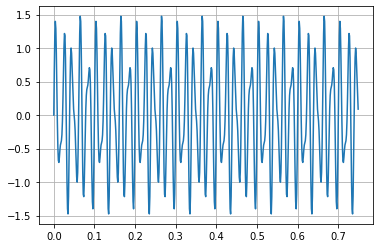

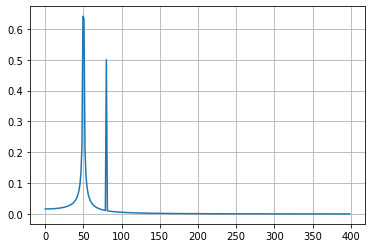

In [136]:
from scipy.fft import fft, fftfreq

N = 600 # Number of sample points
T = 1.0 / 800.0 # sample spacing
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

plt.plot(x,y)
plt.grid()
plt.show()

yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

300


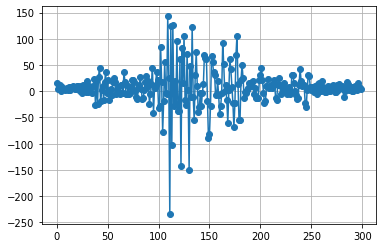

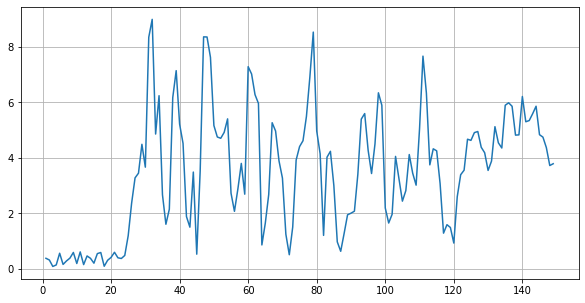

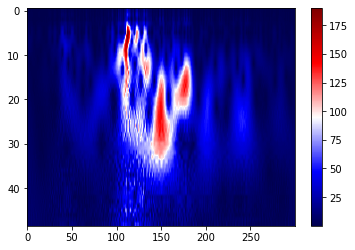

300


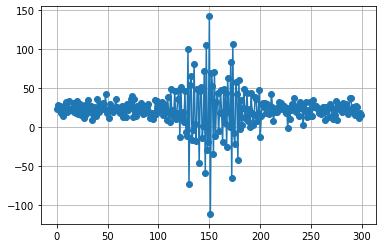

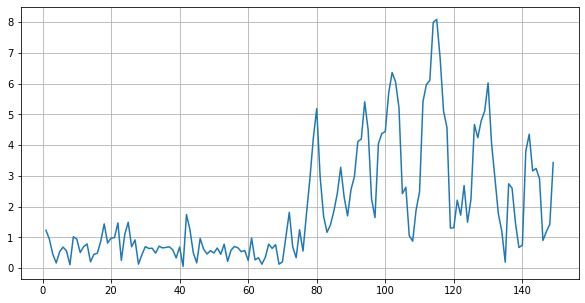

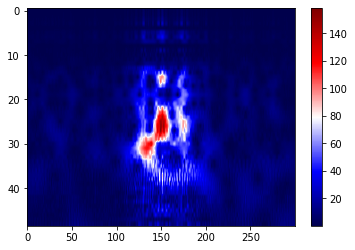

In [250]:
y = [15.900,3.608,9.130,11.829,0.931,8.754,3.937,5.211,2.574,4.422,6.564,2.476,8.674,1.655,8.357,5.823,9.658,8.365,4.219,4.789,10.524,9.635,7.031,0.940,9.344,-3.661,11.013,4.449,3.976,-0.634,18.781,-0.949,10.514,7.501,8.024,-3.835,9.444,23.494,-25.444,20.046,-23.574,26.984,44.362,-19.174,1.641,10.516,-16.292,17.032,36.117,-3.130,21.856,-15.753,2.754,3.700,-7.127,17.996,25.011,17.144,-6.094,3.306,7.746,-0.675,-4.940,12.698,12.638,-3.442,36.687,16.941,-6.066,-4.731,10.719,-5.489,-2.873,7.396,20.750,21.871,17.006,-0.118,-11.845,-15.630,5.877,12.239,27.241,4.459,-15.028,-12.167,2.102,17.413,28.700,7.255,19.858,-23.373,-5.835,14.242,44.410,-41.478,6.334,12.459,36.080,20.864,-32.232,-28.792,85.063,17.948,-77.812,-18.582,55.533,-3.139,-4.463,143.089,24.969,-233.984,125.271,-102.304,126.449,-28.846,19.345,-23.461,96.247,-37.080,-38.201,61.144,-142.944,83.220,15.477,106.218,-17.601,-26.144,70.696,2.563,-149.869,47.915,-10.947,123.265,-10.404,-55.447,30.523,74.242,10.575,-39.389,-30.900,-3.532,-28.864,-3.625,13.585,68.236,63.844,61.504,-18.116,-88.923,-81.912,-28.497,66.936,55.606,36.504,31.537,-7.474,-5.566,19.437,-7.351,-43.821,-28.760,-3.056,92.988,51.850,-0.414,11.921,-17.064,-60.511,3.170,60.971,41.880,8.799,-22.138,-68.700,-22.686,68.358,106.172,14.190,-54.264,-55.104,22.384,49.985,25.119,-12.806,-2.247,-3.177,1.893,5.758,15.544,11.314,9.997,16.767,18.907,-4.411,6.344,-12.324,-13.230,-12.177,21.727,30.778,43.593,21.288,-3.031,-23.153,-18.831,9.396,22.783,5.529,10.854,11.271,5.325,11.684,21.655,13.568,-13.637,-17.122,11.720,24.737,11.424,-4.855,10.267,6.715,15.808,3.206,0.971,-5.017,6.681,8.598,-5.575,1.148,31.435,31.920,16.116,1.412,-7.824,-14.555,-12.409,12.004,43.344,20.043,9.732,11.202,11.150,-22.204,-30.217,2.702,30.813,28.740,9.062,2.529,8.424,4.626,-2.079,9.872,3.512,-4.975,14.333,16.647,6.520,0.013,18.677,8.223,-0.900,-0.667,4.678,10.957,1.231,0.534,6.041,9.224,11.648,2.520,-0.997,-2.290,11.093,1.863,14.253,6.963,10.703,10.022,4.889,-10.414,0.038,6.894,17.022,14.106,3.181,7.871,8.042,1.154,0.522,7.786,9.298,8.256,2.465,16.681,8.663,5.445,4.442]
N = len(y) # Number of sample points
T = 1.0 / 300.0 # sample spacing

print(len(y))
plt.plot(y,'-o')
plt.grid()
plt.show()

plt.figure(1, figsize=(10,5))
yf = fft(y)
xf = fftfreq(N, T)[1:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[1:N//2]))
plt.grid()
plt.show()

widths = np.arange(1, 50)
cwtmatr, freqs = pywt.cwt(y, widths, 'cmor0.1-3.0') #'cmor0.2-3.0' morl
cwt_values = np.abs(cwtmatr)

plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()

y = [23.517,28.739,23.236,27.462,18.535,25.895,14.397,25.958,28.622,31.934,19.403,21.359,33.839,24.007,23.513,22.694,31.321,19.361,26.162,18.257,33.314,16.555,20.733,29.411,15.498,23.551,23.140,12.442,29.079,17.077,23.099,35.175,21.622,23.474,27.328,9.629,16.484,25.612,20.759,14.062,35.906,24.363,19.961,29.630,23.349,23.083,31.103,22.804,42.140,18.362,22.440,11.277,29.443,26.246,26.472,19.803,23.256,24.438,35.842,26.451,25.259,21.360,18.514,23.790,27.469,13.647,21.448,22.037,13.212,29.468,22.126,29.367,26.835,35.872,40.235,12.842,35.940,21.068,14.081,27.201,25.821,22.356,20.299,30.642,22.279,17.161,26.631,17.910,26.815,25.810,30.237,19.389,11.285,14.139,18.713,10.640,16.091,34.505,17.521,33.532,24.325,28.471,22.008,32.236,15.835,29.666,26.349,21.678,9.373,38.581,17.833,7.303,48.964,22.348,14.354,15.515,46.259,10.164,18.459,36.662,47.122,-12.348,51.820,9.974,18.895,6.714,46.083,-6.582,-11.902,99.970,-73.514,53.782,65.385,-16.797,-3.626,81.636,4.613,-18.192,48.624,48.986,-45.999,46.750,51.398,-13.653,1.830,72.630,-58.683,104.883,-29.023,-18.464,142.430,-111.292,70.093,52.750,-34.261,70.827,-11.446,31.881,44.503,-4.556,18.460,47.252,18.900,-18.619,48.971,5.809,43.670,-24.792,63.660,18.930,0.732,83.188,-65.349,107.129,-7.967,-21.887,58.257,42.691,-42.136,61.052,-1.699,35.130,3.383,24.488,49.467,11.358,14.089,43.918,8.272,23.898,0.477,43.549,18.623,3.293,15.473,39.152,35.695,7.754,18.693,47.306,-12.675,14.971,29.674,30.931,25.499,31.526,18.584,29.225,27.845,16.332,18.174,42.038,26.466,8.296,19.628,21.696,19.473,26.299,32.327,23.087,30.437,27.124,24.877,26.704,20.788,17.745,24.508,-1.509,22.171,10.137,22.292,29.931,29.948,37.288,26.041,19.344,26.473,23.425,14.742,32.107,25.741,30.098,2.509,21.493,21.307,32.320,13.092,22.055,14.940,32.698,13.828,14.661,35.538,26.413,27.635,27.748,24.672,23.985,17.983,22.829,16.408,24.517,25.988,25.422,9.882,21.113,25.747,26.037,13.428,30.244,24.641,10.448,17.186,15.041,33.488,9.624,29.753,22.868,24.768,29.003,18.946,30.583,20.747,23.228,29.702,21.758,16.327,22.017,36.891,37.199,23.671,25.801,19.082,15.546,26.709,25.914,16.079,12.094,18.806,16.078]
N = len(y) # Number of sample points
T = 1.0 / 300.0 # sample spacing

print(len(y))
plt.plot(y,'-o')
plt.grid()
plt.show()

plt.figure(1, figsize=(10,5))
yf = fft(y)
xf = fftfreq(N, T)[1:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[1:N//2]))
plt.grid()
plt.show()

widths = np.arange(1, 50)
cwtmatr, freqs = pywt.cwt(y, widths, 'cmor0.1-10.0') #'cmor0.2-3.0' morl
cwt_values = np.abs(cwtmatr)

plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()

300


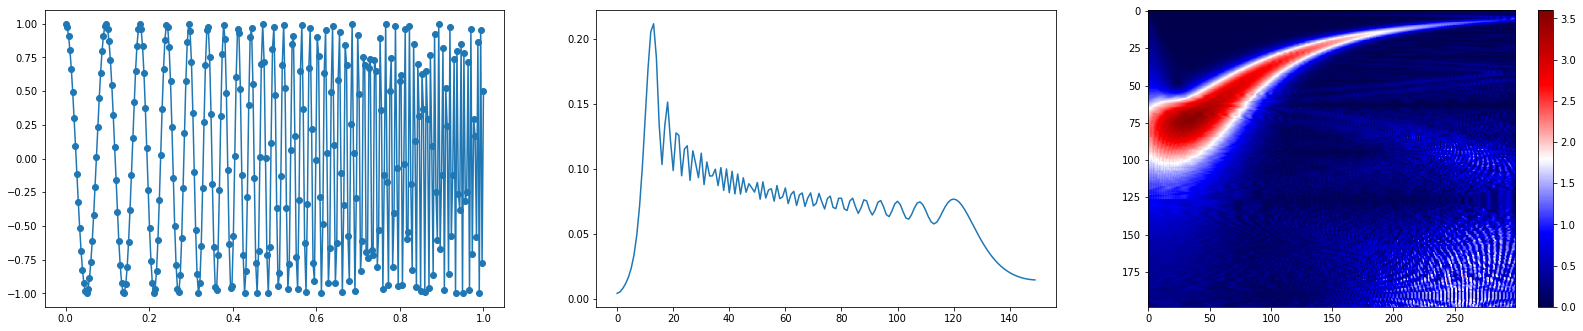

300


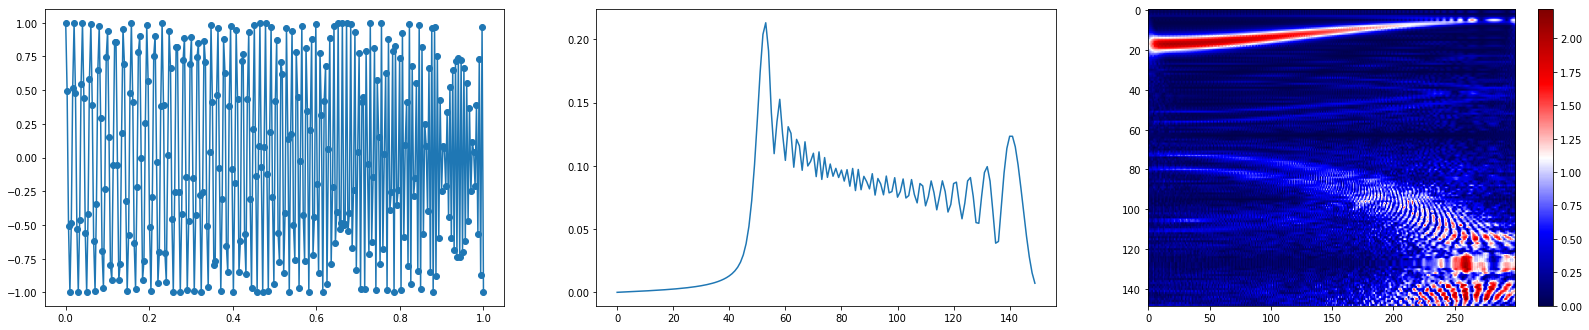

In [258]:
#---------------------------- Test Signal 1
from scipy.signal import chirp, spectrogram
N = 300 # Number of sample points
T = 1.0 / 300.0 # sample spacing
t_1 = np.linspace(0, N*T, N)
x_1 = chirp(t_1, 10, 2, 500, 'quadratic')
print(len(x_1))
#----------------------------------------------------------------- Plot Wavelet Signal 1
signal = x_1
plt.figure(1, figsize=(28,12))
plt.clf()
plt.subplot(231)
#---------------------------------- Signal in Time
plt.plot(t_1,signal,'-o')
plt.show
plt.subplot(232)
#---------------------------------- FFT Signal
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show
plt.subplot(233)
#---------------------------------- Wavelet Transform
widths = np.arange(1, 200)
cwtmatr, freqs = pywt.cwt(signal, widths, 'cmor0.2-3.0') #'cmor0.2-100.0' morl
cwt_values = np.abs(cwtmatr)

plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()


#---------------------------- Test Signal 1
from scipy.signal import chirp, spectrogram
N = 300 # Number of sample points
T = 1.0 / 300.0 # sample spacing
t_1 = np.linspace(0, N*T, N)
x_1 = chirp(t_1, 50, 2, 500, 'quadratic')
print(len(x_1))
#----------------------------------------------------------------- Plot Wavelet Signal 1
signal = x_1
plt.figure(1, figsize=(28,12))
plt.clf()
plt.subplot(231)
#---------------------------------- Signal in Time
plt.plot(t_1,signal,'-o')
plt.show
plt.subplot(232)
#---------------------------------- FFT Signal
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show
plt.subplot(233)
#---------------------------------- Wavelet Transform
widths = np.arange(1, 150)
cwtmatr, freqs = pywt.cwt(signal, widths, 'cmor0.2-3.0') # 'cmor0.2-6.0' morl
cwt_values = np.abs(cwtmatr)

plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()

In [140]:
#---------------------------- Test Signal 1
from scipy.signal import chirp, spectrogram
N = 256 # Number of sample points
T = 1.0 / 800.0 # sample spacing
t_1 = np.linspace(0, N*T, N)
x_1 = chirp(t_1, 10, 2, 100, 'quadratic')


#---------------------------- Test Signal 2
t1 = np.linspace(0, N*T, N)
sig1  = np.sin(np.pi * 6 * t1)
sing2_f=np.zeros(256)
t2 = np.linspace(0, 1, 50)
sig2  = 3* np.sin(np.pi * 20 * t2)
noise = np.random.randn(50)
sig2 += noise
for i in range(50,100):
    sing2_f[i]=sig2[i-50]
x_2 = sig1 + sing2_f 


#---------------------------- Test Signal 3
t_3 = np.linspace(0, N*T, N)
x_3 = chirp(t_3, 10, 2, 100, 'quadratic')



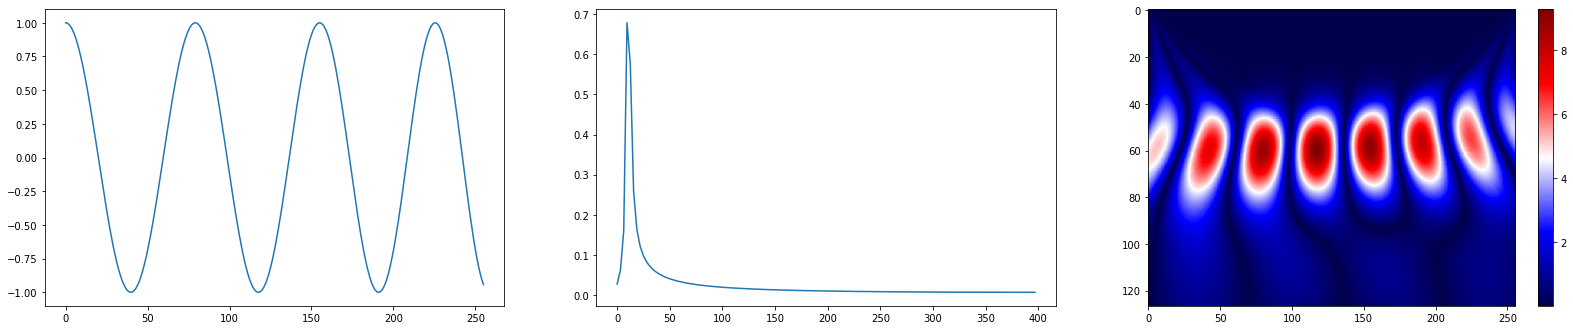

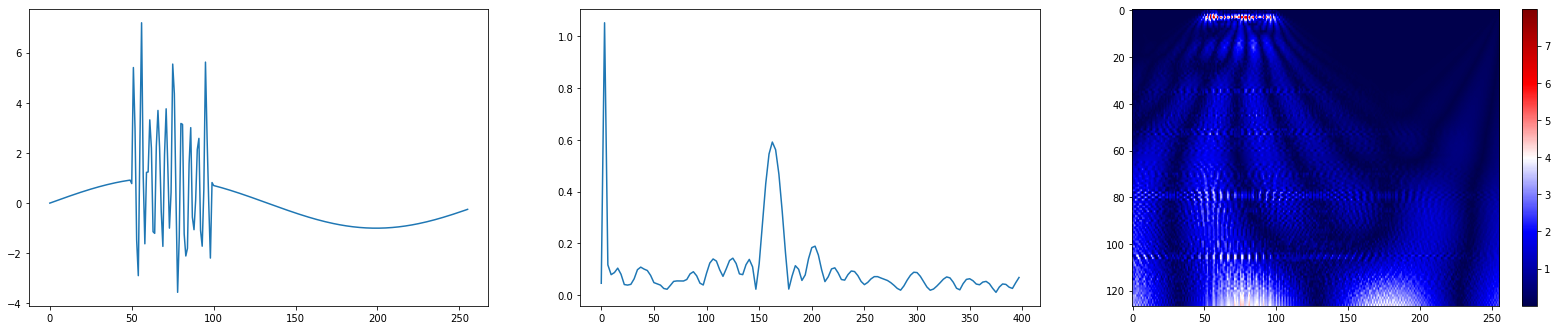

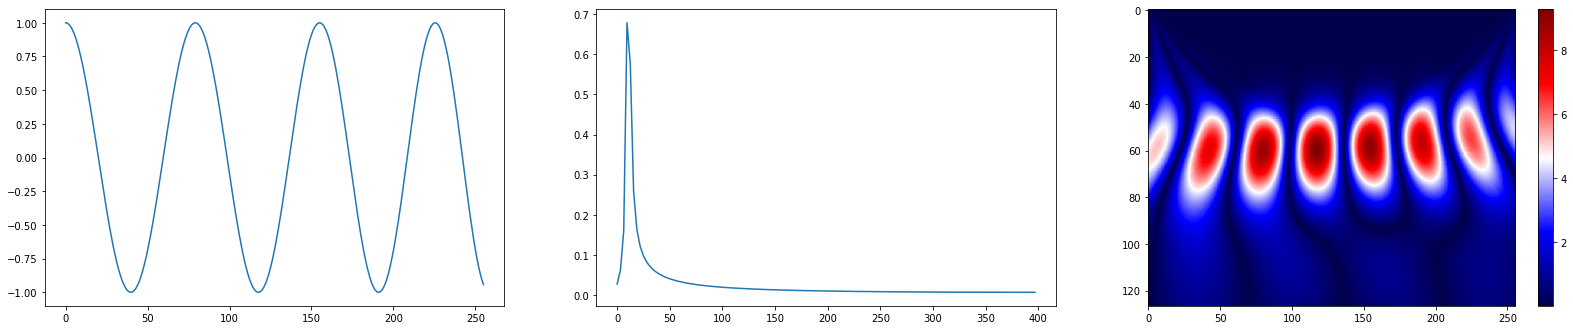

In [141]:
#----------------------------------------------------------------- Plot Wavelet Signal 1
signal = x_1
plt.figure(1, figsize=(28,12))
plt.clf()
plt.subplot(231)
#---------------------------------- Signal in Time
plt.plot(signal)
plt.show
plt.subplot(232)
#---------------------------------- FFT Signal
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show
plt.subplot(233)
#---------------------------------- Wavelet Transform
widths = np.arange(1, 128)
cwtmatr, freqs = pywt.cwt(signal, widths, 'morl') #'cmor0.2-3.0'
cwt_values = np.abs(cwtmatr)

plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()


#----------------------------------------------------------------- Plot Wavelet Signal 2
signal = x_2
plt.figure(1, figsize=(28,12))
plt.clf()
plt.subplot(231)
#---------------------------------- Signal in Time
plt.plot(signal)
plt.show
plt.subplot(232)
#---------------------------------- FFT Signal
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show
plt.subplot(233)
#---------------------------------- Wavelet Transform
widths = np.arange(1, 128)
cwtmatr, freqs = pywt.cwt(signal, widths, 'morl') #'cmor0.2-3.0'
cwt_values = np.abs(cwtmatr)

plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()


#----------------------------------------------------------------- Plot Wavelet Signal 3
signal = x_3
plt.figure(1, figsize=(28,12))
plt.clf()
plt.subplot(231)
#---------------------------------- Signal in Time
plt.plot(signal)
plt.show
plt.subplot(232)
#---------------------------------- FFT Signal
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show
plt.subplot(233)
#---------------------------------- Wavelet Transform
widths = np.arange(1, 128)
cwtmatr, freqs = pywt.cwt(signal, widths, 'morl') #'cmor0.2-3.0'
cwt_values = np.abs(cwtmatr)

plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()

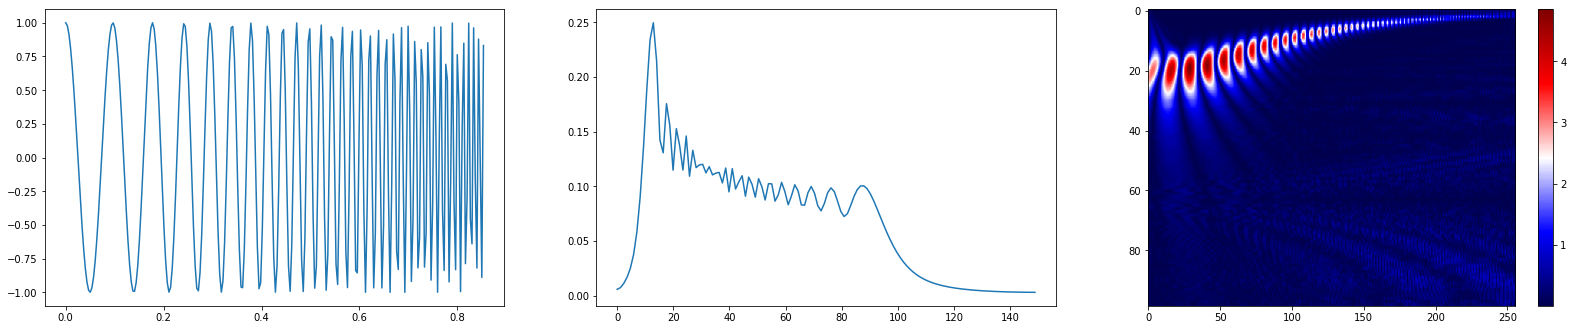

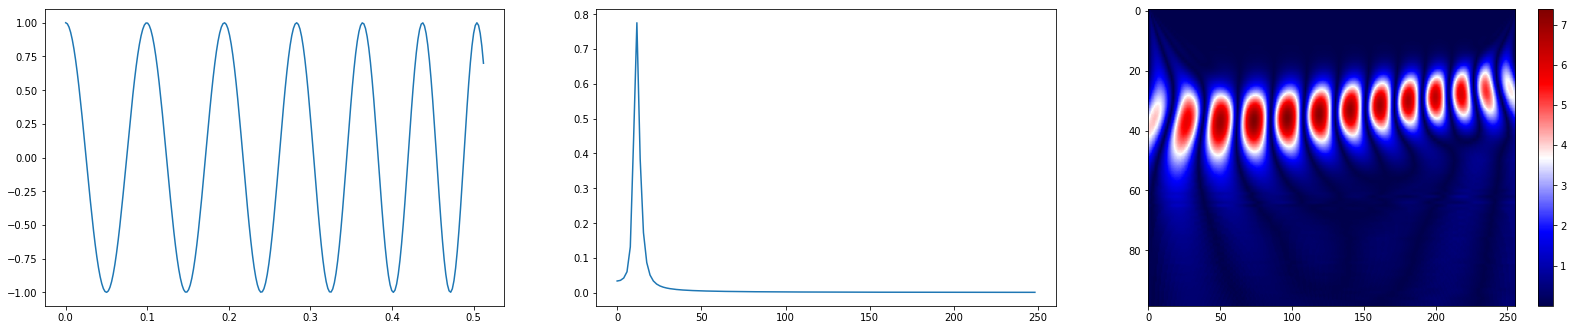

In [179]:
#---------------------------- Test Signal 1
from scipy.signal import chirp, spectrogram
N = 256 # Number of sample points
T = 1.0 / 300.0 # sample spacing
t_1 = np.linspace(0, N*T, N)
x_1 = chirp(t_1, 10, 2, 500, 'quadratic')

#----------------------------------------------------------------- Plot Wavelet Signal 1
signal = x_1
plt.figure(1, figsize=(28,12))
plt.clf()
plt.subplot(231)
#---------------------------------- Signal in Time
plt.plot(t_1,signal)
plt.show
plt.subplot(232)
#---------------------------------- FFT Signal
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show
plt.subplot(233)
#---------------------------------- Wavelet Transform
widths = np.arange(1, 100)
cwtmatr, freqs = pywt.cwt(signal, widths, 'morl') #'cmor0.2-100.0'
cwt_values = np.abs(cwtmatr)

plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()

#---------------------------- Test Signal 1
from scipy.signal import chirp, spectrogram
N = 256 # Number of sample points
T = 1.0 / 500.0 # sample spacing
t_1 = np.linspace(0, N*T, N)
x_1 = chirp(t_1, 10, 2, 100, 'quadratic')

#----------------------------------------------------------------- Plot Wavelet Signal 1
signal = x_1
plt.figure(1, figsize=(28,12))
plt.clf()
plt.subplot(231)
#---------------------------------- Signal in Time
plt.plot(t_1,signal)
plt.show
plt.subplot(232)
#---------------------------------- FFT Signal
yf = fft(signal)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show
plt.subplot(233)
#---------------------------------- Wavelet Transform
widths = np.arange(1, 100)
cwtmatr, freqs = pywt.cwt(signal, widths, 'morl') #'cmor0.2-3.0'
cwt_values = np.abs(cwtmatr)

plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()

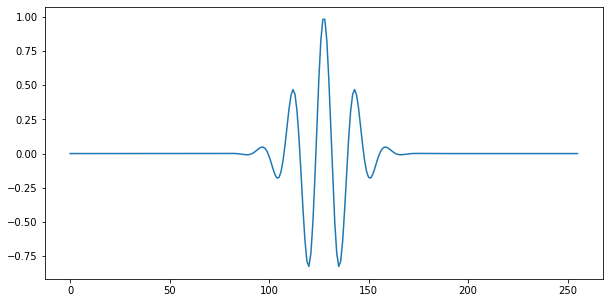

In [20]:
t_1 = np.linspace(-10, 10, 256)

# Morlet wavelet 
w_mor = []
for t in t_1:
    w_mor.append(np.exp(- (t**2)/2) * math.cos(5*t))  
w_mor = np.array(w_mor)

signal = w_mor
plt.figure(1, figsize=(10,5))
plt.plot(signal)
plt.show()

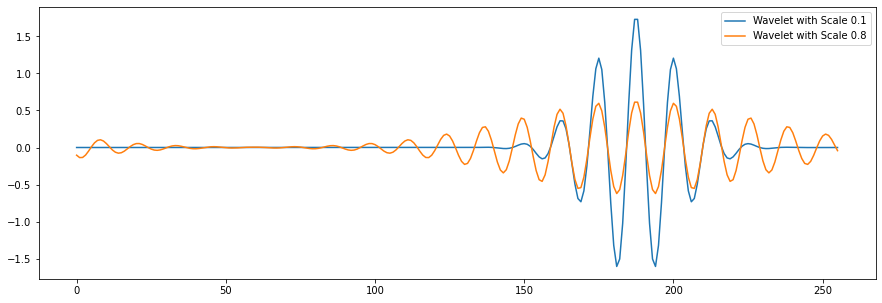

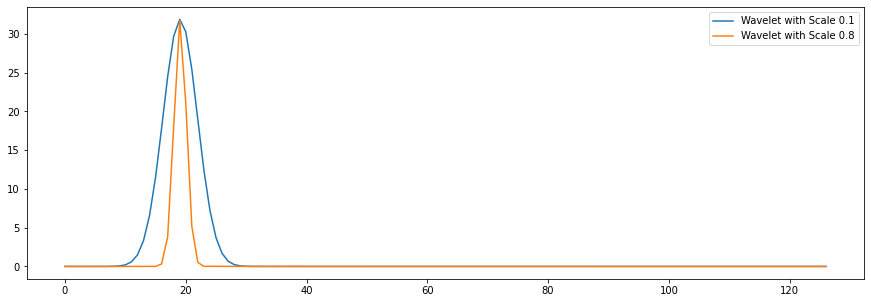

In [119]:
from collections import deque
def Complex_Morlet_Wavelet(B,C,t_shift): # B: T_p the bandwidth (Period Parameter), the scale factor / C: # f_c the center frequency
    t_1 = np.linspace(-2, 2, 256)
    w_mor_complex = []
    for t in t_1:
        w_mor_complex.append((1/(math.sqrt(math.pi*B))) * np.exp(- (t**2)/B) * np.exp(2j*math.pi*C*t))
    w_mor_complex = np.array(w_mor_complex)
    w_mor_complex_abs = np.abs(w_mor_complex)
    w_mor_complex_real = w_mor_complex.real
    w_mor_complex_complex = w_mor_complex.imag
    
    w_mor_complex_abs = deque(w_mor_complex_real)
    w_mor_complex_real = deque(w_mor_complex_real)
    w_mor_complex_complex = deque(w_mor_complex_complex)
    w_mor_complex_abs.rotate(t_shift)
    w_mor_complex_real.rotate(t_shift)
    w_mor_complex_complex.rotate(t_shift)
    
    return(w_mor_complex_abs,w_mor_complex_real,w_mor_complex_complex)


plt.figure(1, figsize=(15,5))
w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.1, 5.0, 60)
plt.plot(w_real,label="Wavelet with Scale 0.1")
w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.8, 5.0, 60)
plt.plot(w_real,label="Wavelet with Scale 0.8")
plt.legend()
plt.show()


plt.figure(2, figsize=(15,5))
w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.1, 5.0, 60)
n = len(w_real)
spectrum = np.fft.fft(w_real) 
spectrum_magnitude = np.abs(spectrum)
plt.plot(spectrum_magnitude[1:n//2],label="Wavelet with Scale 0.1") 
w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.8, 5.0, 60)
n = len(w_real)
spectrum = np.fft.fft(w_real) 
spectrum_magnitude = np.abs(spectrum)
plt.plot(spectrum_magnitude[1:n//2],label="Wavelet with Scale 0.8") 
plt.legend()
plt.show()

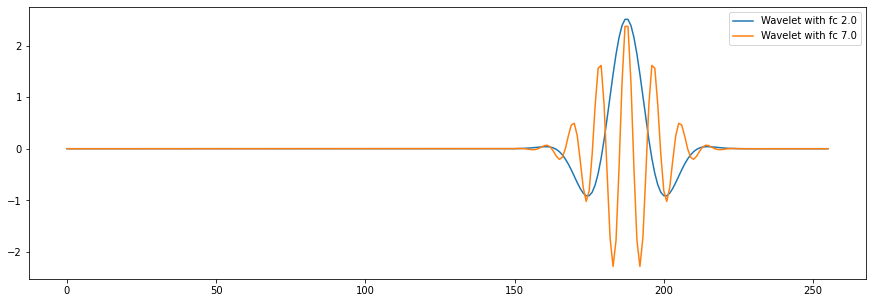

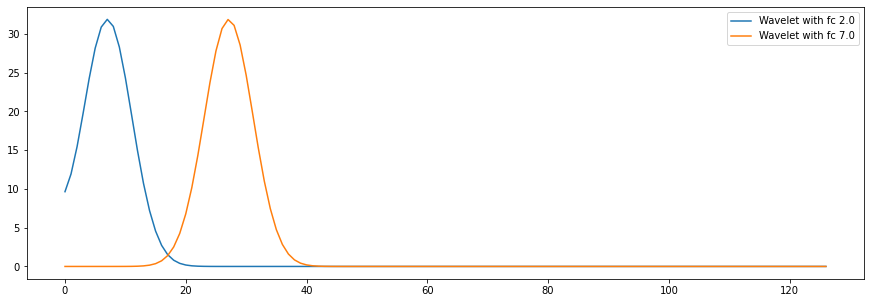

In [263]:
plt.figure(1, figsize=(15,5))
w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.05, 2.0, 60)
plt.plot(w_real,label="Wavelet with fc 2.0")
w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.05, 7.0, 60)
plt.plot(w_real,label="Wavelet with fc 7.0")
plt.legend()
plt.show()


plt.figure(2, figsize=(15,5))
w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.05, 2.0, 60)
n = len(w_real)
spectrum = np.fft.fft(w_real) 
spectrum_magnitude = np.abs(spectrum)
plt.plot(spectrum_magnitude[1:n//2],label="Wavelet with fc 2.0") 
w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.05, 7.0, 60)
n = len(w_real)
spectrum = np.fft.fft(w_real) 
spectrum_magnitude = np.abs(spectrum)
plt.plot(spectrum_magnitude[1:n//2],label="Wavelet with fc 7.0") 
plt.legend()
plt.show()

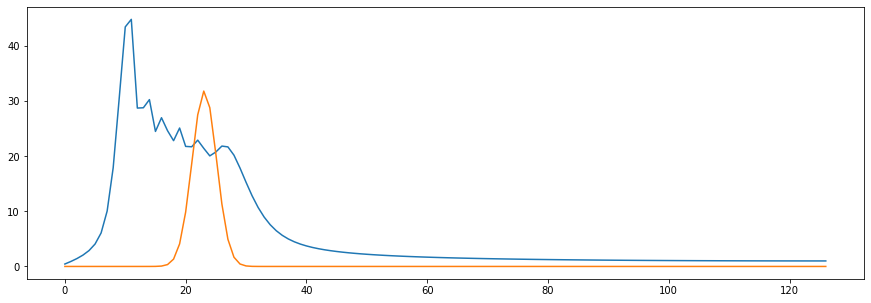

In [123]:
plt.figure(3, figsize=(15,5))
t_1 = np.linspace(0, 1, 256)
x_1 = chirp(t_1, 10, 2, 100, 'quadratic')
n = len(x_1)
spectrum = np.fft.fft(x_1) 
spectrum_magnitude = np.abs(spectrum)
plt.plot(spectrum_magnitude[1:n//2],label="Scale 0.1") 

w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.2, 6.0, 60)
n = len(w_real)
spectrum = np.fft.fft(w_real) 
spectrum_magnitude = np.abs(spectrum)
plt.plot(spectrum_magnitude[1:n//2],label="Scale 0.1") 

plt.show()





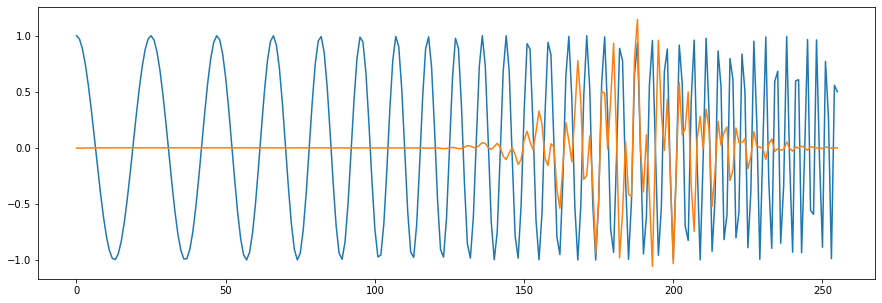

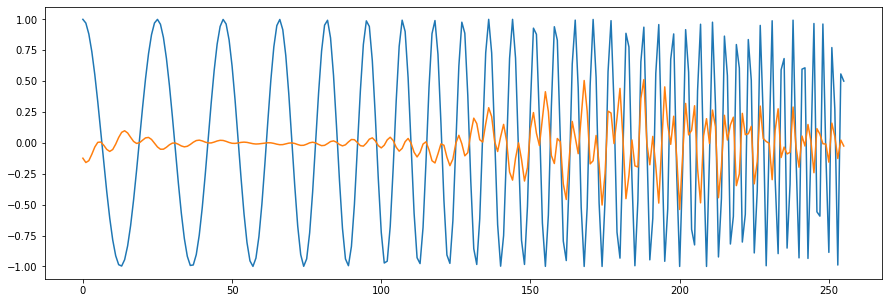

In [108]:
t_1 = np.linspace(0, 1, 256)
x_1 = chirp(t_1, 10, 2, 300, 'quadratic')


w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.2, 5.0, 60)
product = [a * b for a, b in zip(w_real, x_1)]

plt.figure(1, figsize=(15,5))
plt.plot(x_1)
#plt.plot(w_real)
plt.plot(product)
plt.show()

w_abs, w_real, w_imag = Complex_Morlet_Wavelet(1.0, 5.0, 60)
product = [a * b for a, b in zip(w_real, x_1)]

plt.figure(1, figsize=(15,5))
plt.plot(x_1)
#plt.plot(w_real)
plt.plot(product)
plt.show()